In [25]:
import matplotlib.pyplot as plt

def plot_multiple_subplots_with_labels(x_data, y_data_list, titles, labels):
    """
    在一张图中创建三个子图，每个子图包含多条曲线和标签。

    参数：
    - x_data：x轴数据，列表或数组形式。
    - y_data_list：包含三个元素的列表，每个元素是对应子图的y轴数据列表，长度为3。
    - titles：每个子图的标题列表，长度为3。
    - labels：曲线的标签列表，长度为3。
    """
    # 创建一个包含1行3列的子图布局
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # 遍历每个子图
    for i in range(3):
        # 绘制多条曲线
        for y_data, label in zip(y_data_list[i], labels):
            axes[i].plot(x_data, y_data, label=label)
        
        # 设置标题和图例
        axes[i].set_title(titles[i])
        axes[i].legend()
        axes[i].grid(True)
    
    # 自动调整子图间距
    plt.tight_layout()
    plt.show()





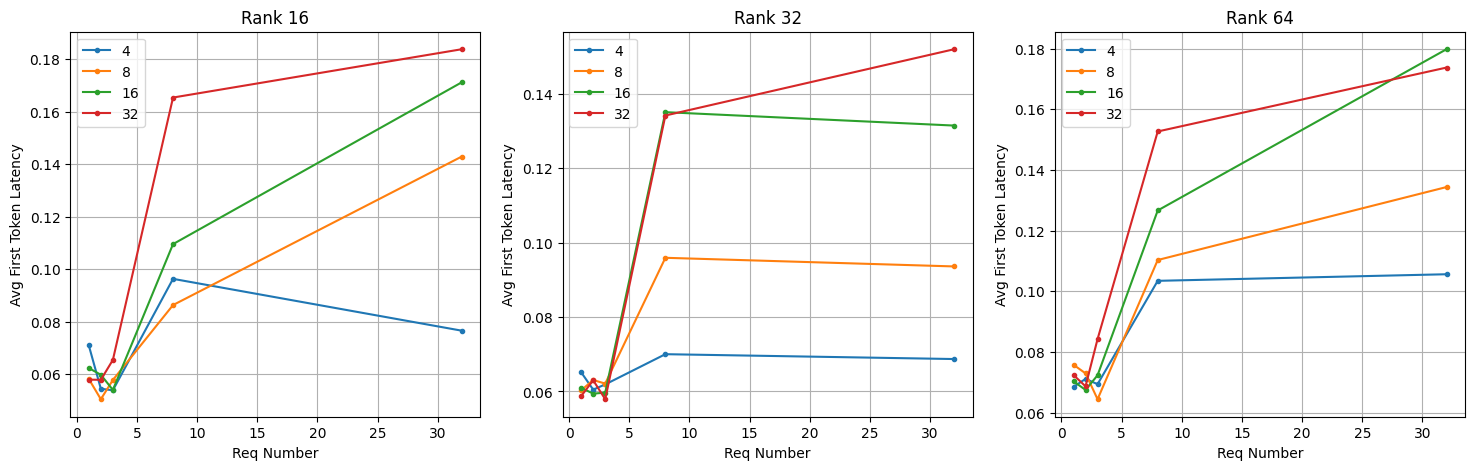

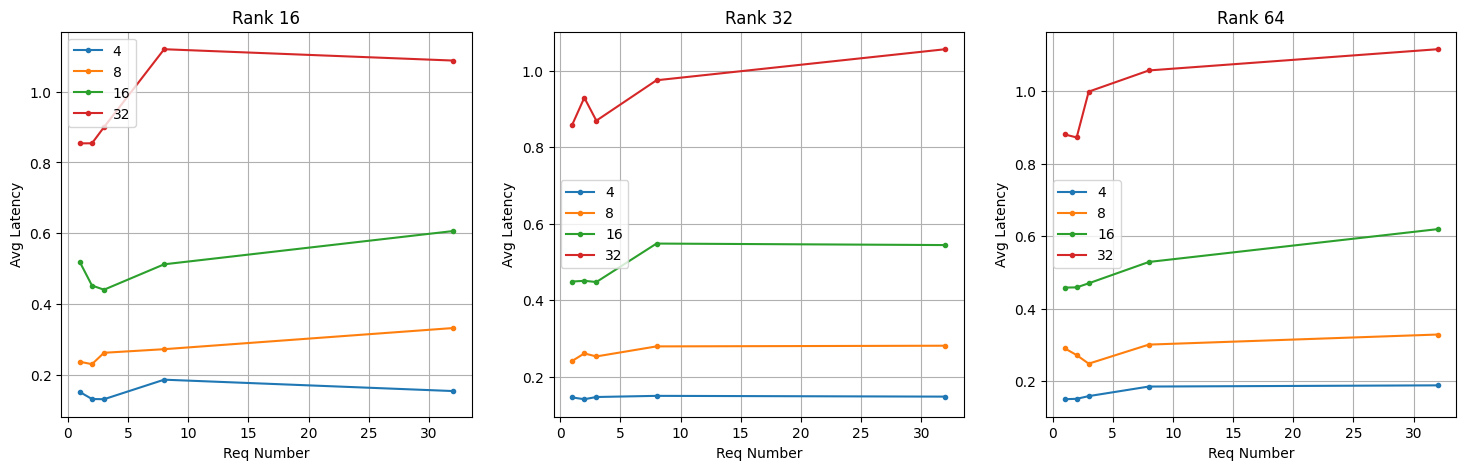

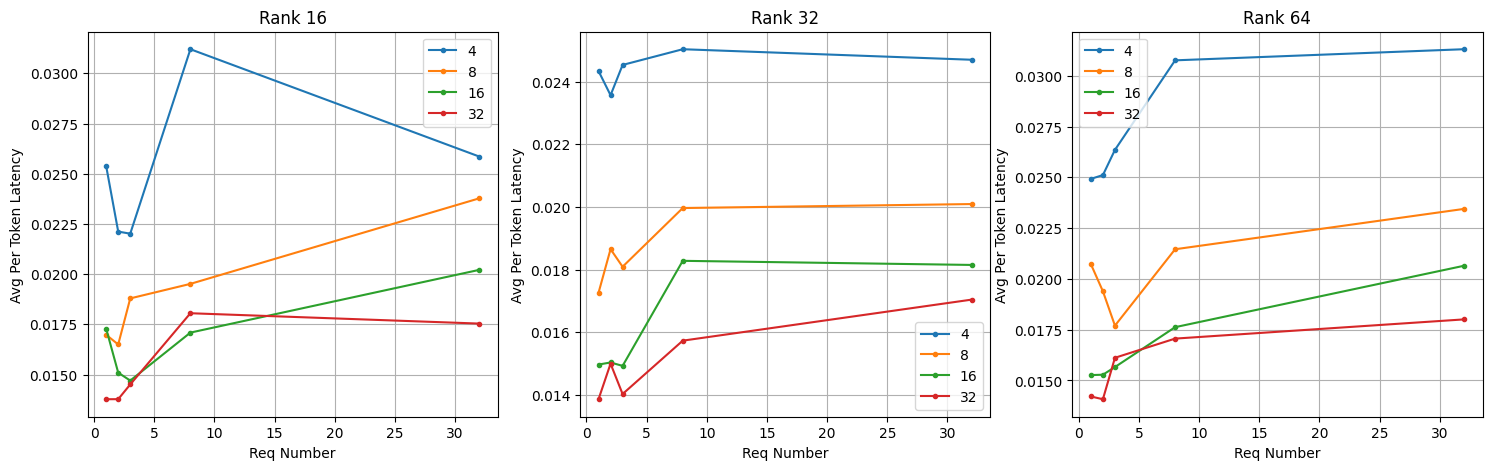

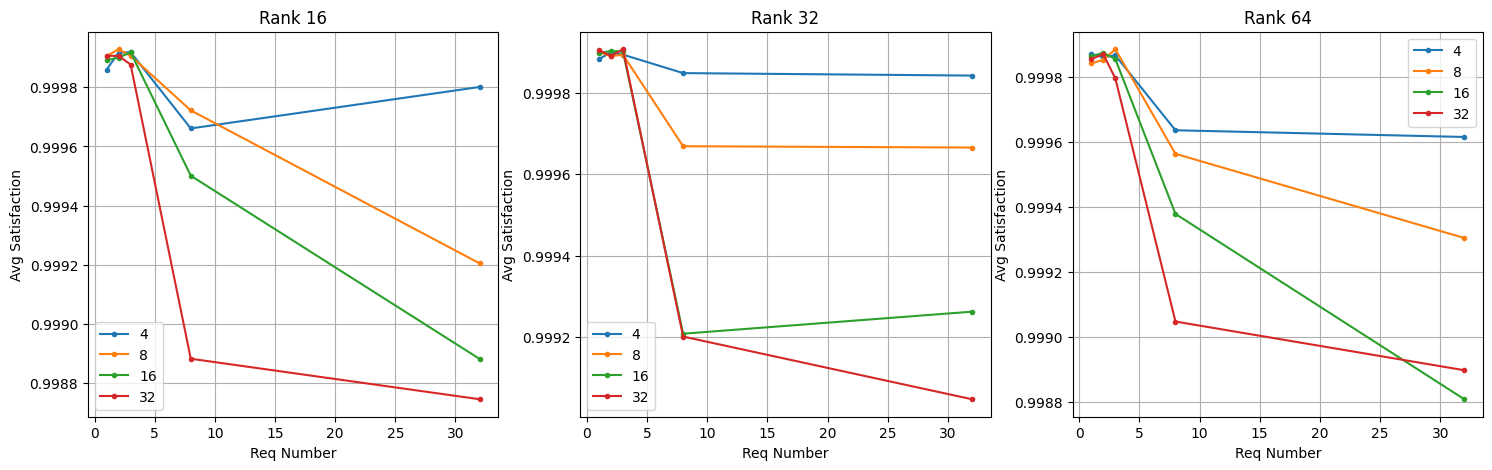

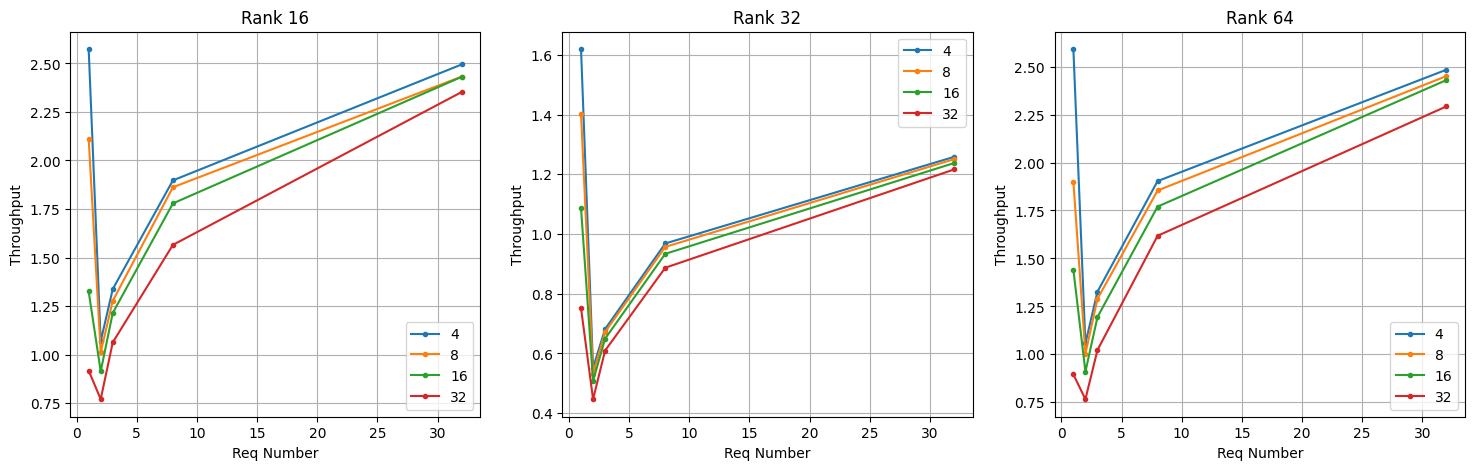

In [56]:
# signle adapter, single length, x req counts, y first tokens latency, label diff input length
# signle adapter, single length,x req counts, y avg latency, label diff input length
import json
import matplotlib.pyplot as plt


def getData(filePath):
    inputLenToResult = {} # {inputLen: [result]}
    with open(filePath, "r") as file:
        for line in file:
            # 解析每一行 JSON 数据
            data = json.loads(line)
            if data["config"]["input_range"][0] not in inputLenToResult:
                inputLenToResult[data["config"]["input_range"][0]] = [data["result"]]
            else:
                inputLenToResult[data["config"]["input_range"][0]].append(data["result"])
            # 提取 num_adapters 和 throughput, avg_latency
            # num_adapters.append(data["config"]["num_adapters"])
            # throughputs.append(data["result"]["throughput"])
            # latencies.append(data["result"]["avg_latency"])
    return inputLenToResult

def plot_multiple_subplots_with_labels(x_data, y_data_list, titles, labels, ymetricName):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i in range(3):
        # for y_data, label in zip(y_data_list[i], labels):
        for key, resultList in y_data_list[i].items():
            y_data = []
            for result in resultList:
                y_data.append(result[ymetricName])
            # print(y_data)
            # if key == 2046:
            #     continue
            axes[i].plot(x_data, y_data, label=key+2, marker='.')
        
        axes[i].set_title(titles[i])
        axes[i].legend()
        axes[i].grid(True)
        axes[i].set_xlabel("Req Number")
        ymetricNameFormated = ' '.join(word.capitalize() for word in ymetricName.split('_'))
        axes[i].set_ylabel(ymetricNameFormated)
        # axes[i].set_ylim(0, 3)
    # 设置全局标签
    # fig.text(0.5, 0.04, "Req Number", ha='center')
    # fig.text(0.04, 0.5, "Latency", va='center', rotation='vertical')

    plt.show()
x_total_req = [1, 2, 3, 8, 32]
titles = ["Rank 16", "Rank 32", "Rank 64"]
request_len_label = [4, 8, 16, 2048]
rank_1_result = getData("req_len_latency_baseline_adapter_1.jsonl")
# for key, value in rank_1_result.items():
#     print(key)
rank_2_result = getData("req_len_latency_baseline_adapter_2.jsonl")
rank_3_result = getData("req_len_latency_baseline_adapter_3.jsonl")
y = [
    rank_2_result,
    rank_1_result,
    rank_3_result
]
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_first_token_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_per_token_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_satisfaction')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'throughput')

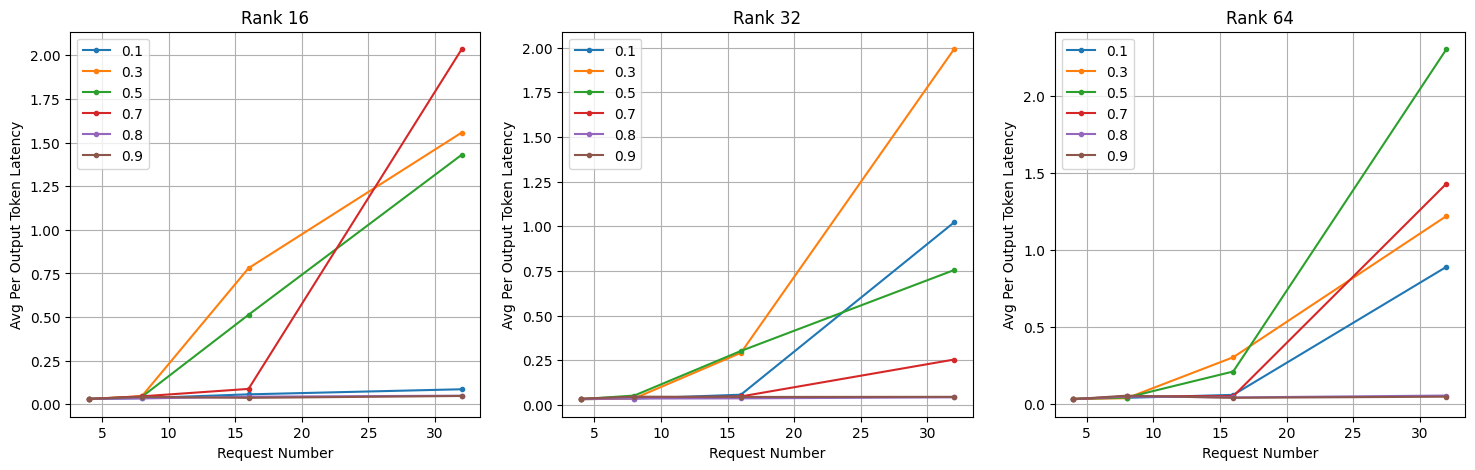

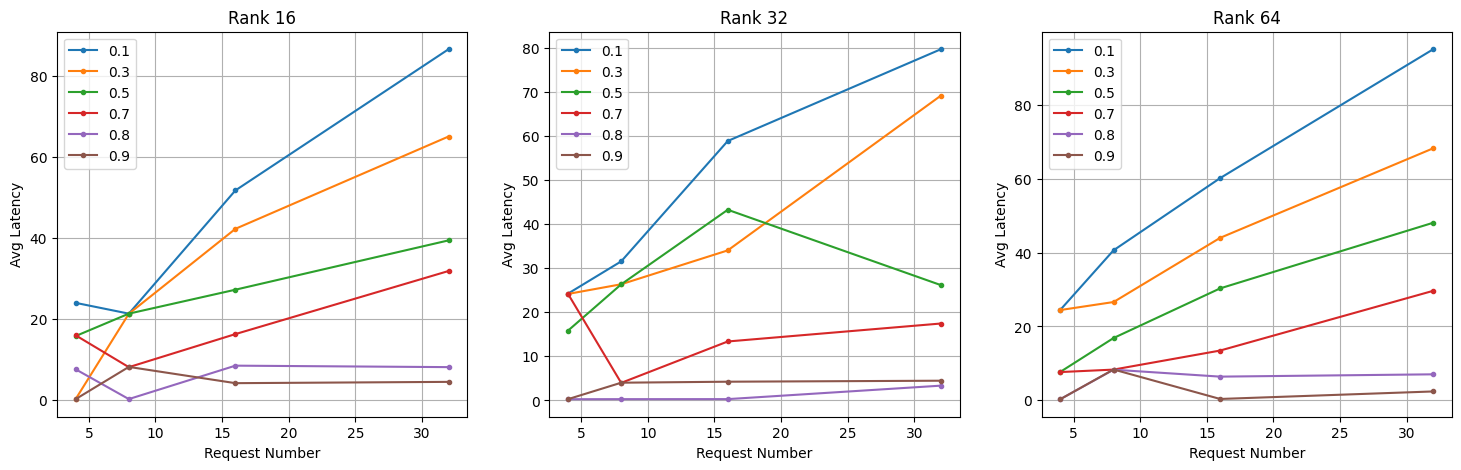

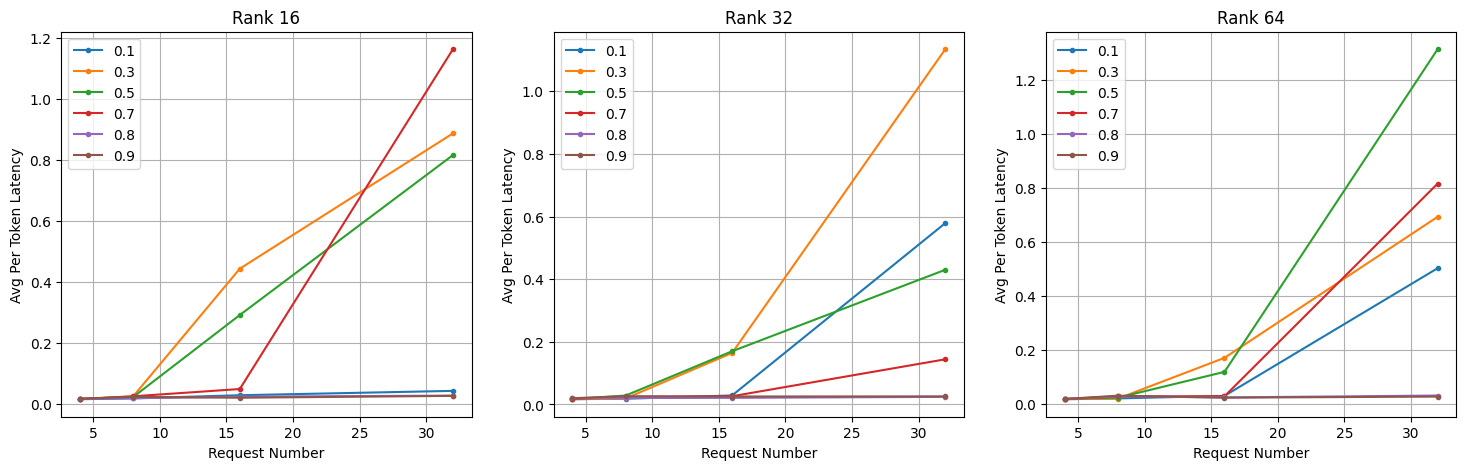

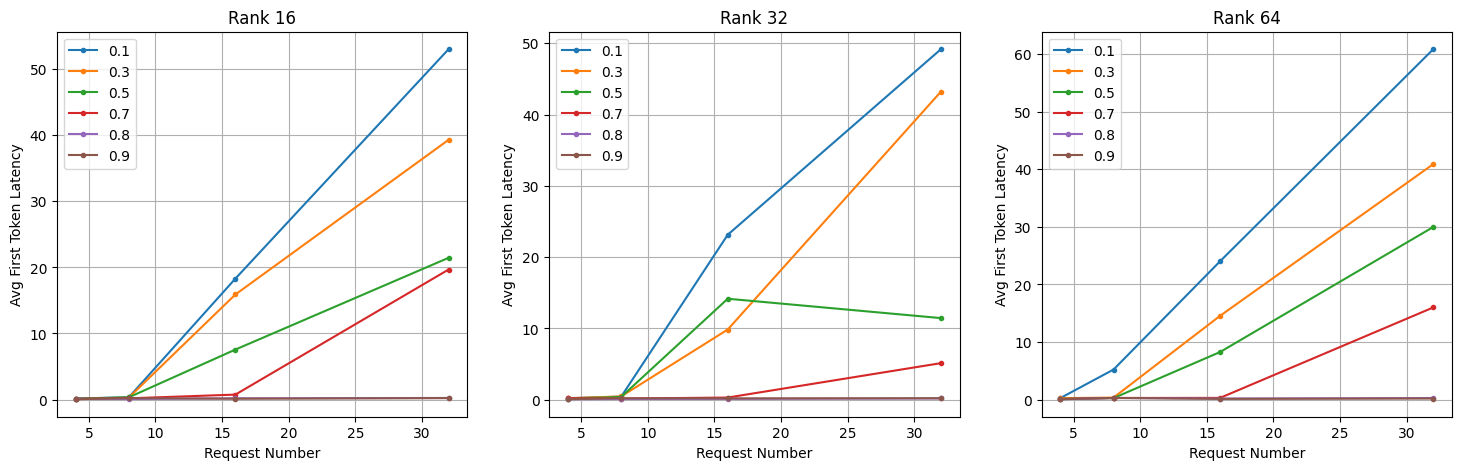

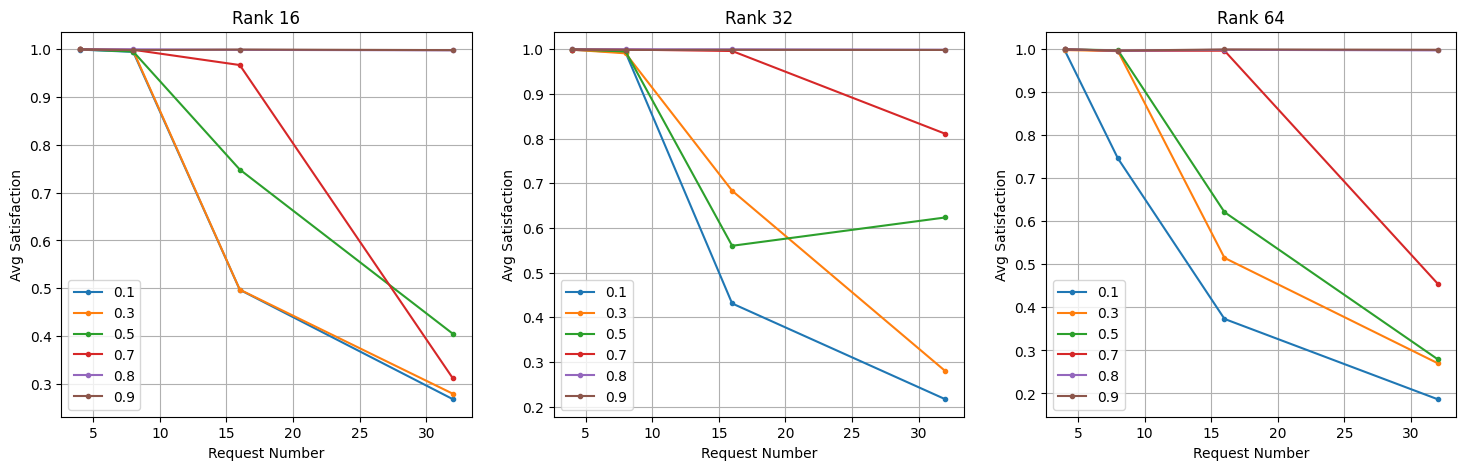

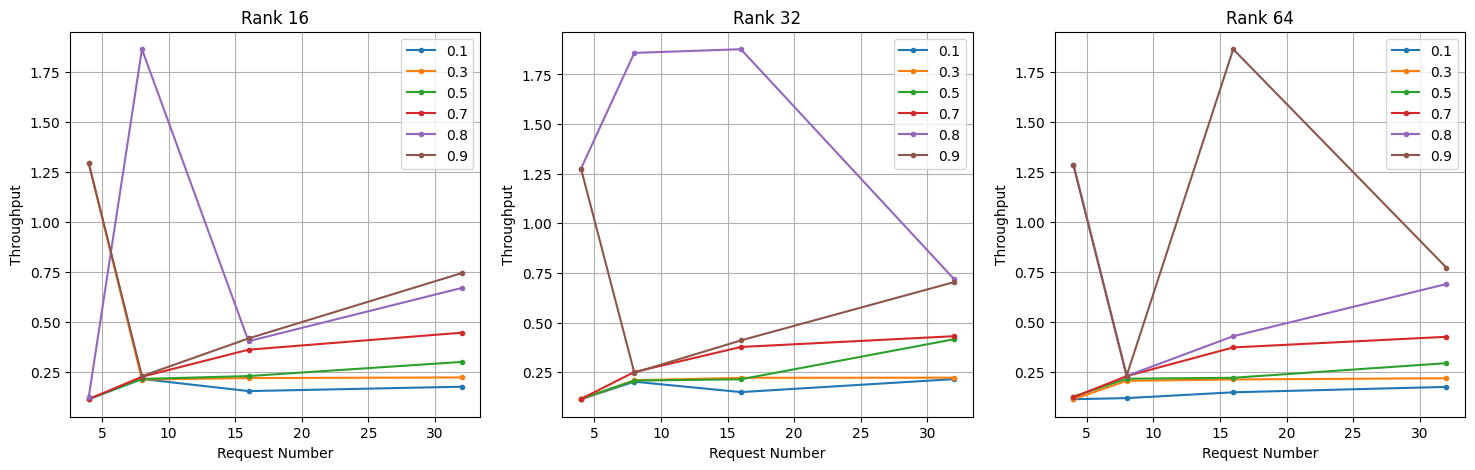

In [62]:
# signle adapter, single length, x req counts, y first tokens latency, label diff input length
# signle adapter, single length,x req counts, y avg latency, label diff input length
import json
import matplotlib.pyplot as plt


def getData(filePath):
    inputLenToResult = {} # {inputLen: [result]}
    with open(filePath, "r") as file:
        for line in file:
            data = json.loads(line)
            if data["config"]["alpha"] not in inputLenToResult:
                inputLenToResult[data["config"]["alpha"]] = [data["result"]]
            else:
                inputLenToResult[data["config"]["alpha"]].append(data["result"])
    return inputLenToResult

def plot_multiple_subplots_with_labels(x_data, y_data_list, titles, request_len_label, ymetricName):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    for i in range(3):
        for key, resultList in y_data_list[i].items():
            y_data = []
            for result in resultList:
                y_data.append(result[ymetricName])
            if key == 2046:
                continue
            # print(key)
            # print(y_data)
            axes[i].plot(x_data, y_data, label=key, marker='.')
        
        axes[i].set_title(titles[i])
        axes[i].legend()
        axes[i].grid(True)
        axes[i].set_xlabel("Request Number")
        ymetricNameFormated = ' '.join(word.capitalize() for word in ymetricName.split('_'))
        axes[i].set_ylabel(ymetricNameFormated)

    plt.show()
x_total_req = [4, 8, 16, 32]
titles = ["Rank 16", "Rank 32", "Rank 64"]
request_len_label = [0.5, 0.8]
rank_1_result = getData("req_avg_len_latency_adapter_1.jsonl")
# for key, value in rank_1_result.items():
#     print(key)
rank_2_result = getData("req_avg_len_latency_adapter_2.jsonl")
rank_3_result = getData("req_avg_len_latency_adapter_3.jsonl")
y = [
    rank_2_result,
    rank_1_result,
    rank_3_result
]
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_per_output_token_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_per_token_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_first_token_latency')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'avg_satisfaction')
plot_multiple_subplots_with_labels(x_total_req, y, titles, request_len_label, 'throughput')